#<p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Introducción </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> El objetivo principal de esta presentación es mostrar el desarrollo de modelos MLP (Multilayer Perceptron) para clasificar imágenes de un subconjunto del dataset CIFAR.
Se presentará la arquitectura del modelo, las decisiones tomadas durante la implementación y los resultados obtenidos. <br>  </font> </p>

# <p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Decisiones previas a la implementación: </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<ul type = "square">
  <li>Las imágenes tienen tamaño 32x32 píxeles y ya estaban normalizadas entre -1.0 y 1.0, por lo que no fue necesario aplicar una normalización adicional.</li><br>
  <li>Se transpusieron los datos para que el canal de color quedara en el último eje (H, W, C), estándar para TensorFlow.</li><br>
  <li>Se remapearon las etiquetas para que las 12 clases tuvieran índices consecutivos.</li>
<ul>
</font> </p>

In [ ]:
#@title Datos{ display-mode: "form" }
from IPython.display import display, HTML # Importing the HTML object
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ­ ­ ­ Normalización:'))
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╭━━━━━━━━━━━━━━━━━━━━━━━╮'))

print("  Rango entre:", images.min()," y ", images.max()," ")

display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╰━━━━━━━━━━━━━━━━━━━━━━━╯'))
print("\n")
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed">  ­ ­ ­ Transposición de imagen:'))
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╭━━━━━━━━━━━━━━━━━━━━━━━╮'))

display(HTML('<span style="font-family:Comic Sans MS; color:red">  ­ ­ ­ image shape antes:'))
img_antes = images
img_despues = np.transpose(images, (0, 2, 3, 1))  # (N, 32, 32, 3)
print("  🡪", img_antes.shape, "\n")
display(HTML('<span style="font-family:Comic Sans MS; color:green">  ­ ­ ­ image shape despues:'))
print("  🡪", img_despues.shape)
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╰━━━━━━━━━━━━━━━━━━━━━━━╯'))
print("\n")
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed">  ­ ­ ­ Etiquetas:'))
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╭━━━━━━━━━━━━━━━━━━━━━━━╮'))


display(HTML('<span style="font-family:Comic Sans MS; color:red"> ­ ­ ­ antes:'))
print("  🡪",labels_antes)
display(HTML('<span style="font-family:Comic Sans MS; color:green"> ­ ­ ­ despues:'))
#labels_despues = np.unique(labels)
print("  🡪",labels_despues)
display(HTML('<span style="font-family:Comic Sans MS; color:#d39aed"> ╰━━━━━━━━━━━━━━━━━━━━━━━╯'))

  Rango entre: -1.0  y  1.0  


  🡪 (3500, 3, 32, 32) 



  🡪 (3500, 32, 32, 3)


  🡪 [ 3 11 13 14 17 28 31 35 69 81 86 94]


  🡪 [ 0  1  2  3  4  5  6  7  8  9 10 11]


# <p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Arquitectura del modelo MLP </font> </p>



<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> El modelo base es una red MLP, compuesta por: <br>  </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<ul type = "square">
  <li><i>Entrada aplanada (Flatten) de tamaño 3072 (32x32x3).</li>
  <li>Dos capas Dense intermedias (512 y 256 neuronas).</li>
  <li>Funciones de activación: ReLU, Tanh o Sigmoid (según experimento).</li>
  <li>Dropout aplicado opcionalmente para mejorar la generalización.</li>
  <li>Salida final de 12 clases usando Softmax</i></li>

  
<ul>
</font> </p>

In [ ]:
#@title Summary del modelo MLP sin dropout { display-mode: "form" }
model_mlp_no_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,123,366 (19.54 MB)

 Trainable params: 1,707,788 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,415,578 (13.03 MB)

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote> En este modelo, se aplana la imagen a un vector y se conecta a una capa de 512 neuronas, luego a otra de 256, y finalmente a la salida.
La mayoría de los parámetros se concentran en la primera capa densa, dado que conecta directamente a todos los píxeles de la imagen. <br>  </font> </p>

In [ ]:
#@title Summary del modelo MLP con dropout { display-mode: "form" }
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,123,366 (19.54 MB)

 Trainable params: 1,707,788 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,415,578 (13.03 MB)

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote> Aquí se mantiene la misma estructura, pero se añade capas Dropout después de cada capa densa.
Estas capas no agregan parámetros nuevos, pero durante el entrenamiento apagan aleatoriamente neuronas, reduciendo así el riesgo de memorizar los datos y mejorando la capacidad de generalizar. <br>  </font> </p>

# <p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Decisiones de implementación </font> </p>


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Para evaluar el desempeño del MLP, se prueba: <br>  </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<ul type = "square">
  <li><i>Dos optimizadores: Adam y SGD.</li>
  <li>Tres funciones de activación: ReLU, Tanh y Sigmoid.</li>
  <li>Modelos con y sin Dropout.</li>
  

  
<ul>
</font> </p>




<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote>Descripción de función de activación:<br> <br>ReLU: Convierte valores negativos a cero y deja pasar los positivos. <br>Tanh: Comprime los valores al rango [-1, 1].<br>Sigmoid: Comprime los valores al rango [0, 1]. <br>  </font> </p>

# <p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Resultados y análisis </font> </p>


## <p align = 'justify'> <font face="Impact" size=4 color='#d39aed'> MODELO MLP CON ADAM </font> </p>


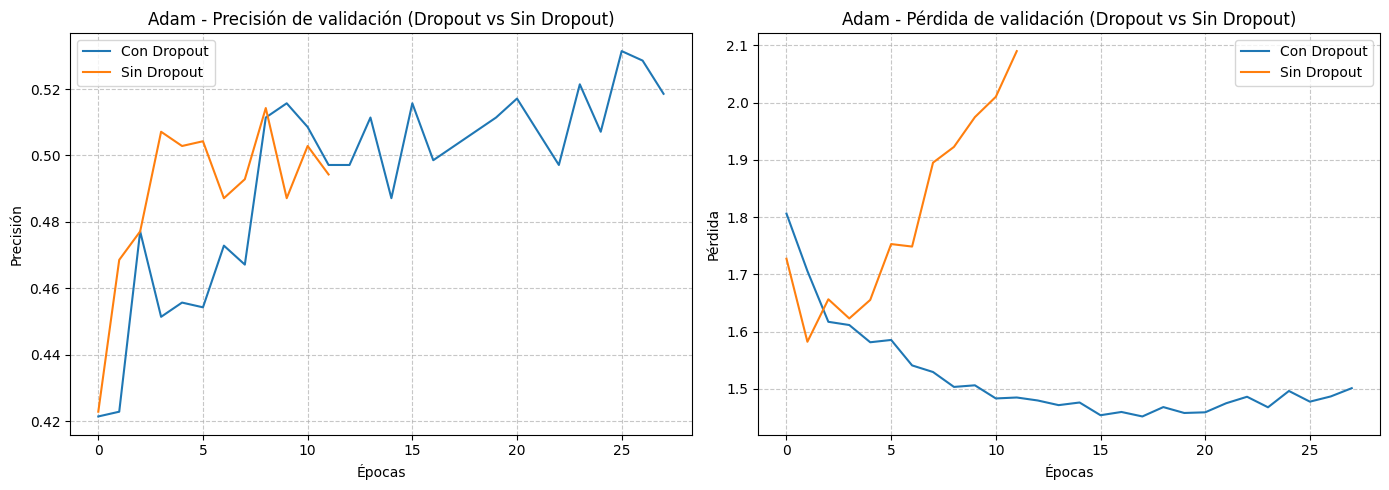

In [ ]:
#@title Comparación de Dropout y sin Dropout (Precisión y Pérdida) { display-mode: "form" }

plt.figure(figsize=(14, 5))  # SOLO UN figure

# Primer gráfico (val_accuracy)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.plot(history_mlp.history['val_accuracy'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_accuracy'], label='Sin Dropout')
plt.title('Adam - Precisión de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Segundo gráfico (val_loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.plot(history_mlp.history['val_loss'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_loss'], label='Sin Dropout')
plt.title('Adam - Pérdida de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todo junto
plt.tight_layout()
plt.show()


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote>Sin Dropout, se presenta overfitting severo: alta precisión en entrenamiento, pero muy mala validación. <br>  </font> </p>

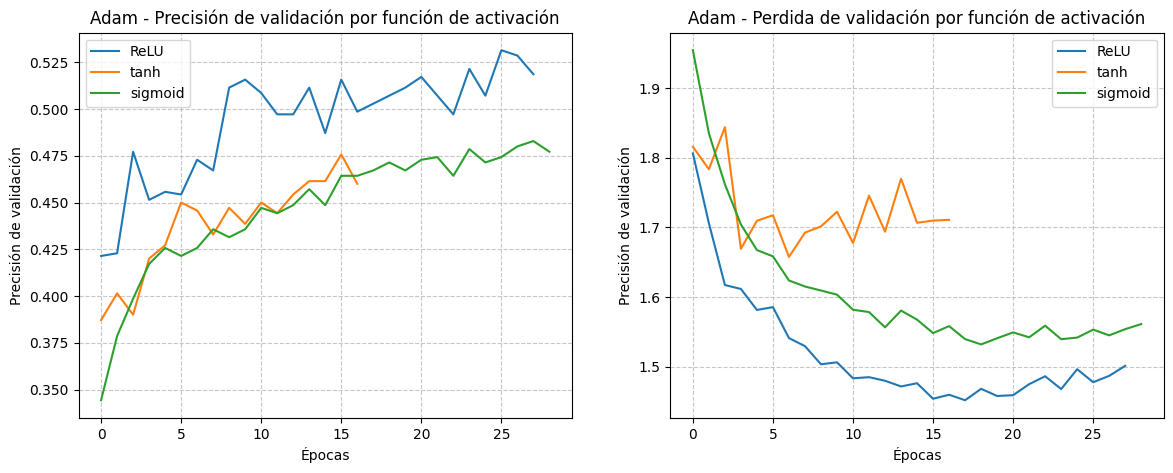

In [ ]:
#@title Comparación de funciones de activación en Adam { display-mode: "form" }

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['val_accuracy'], label='ReLU')
plt.plot(history_mlp_tanh.history['val_accuracy'], label='tanh')
plt.plot(history_mlp_sigmoid.history['val_accuracy'], label='sigmoid')
plt.title('Adam - Precisión de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['val_loss'], label='ReLU')
plt.plot(history_mlp_tanh.history['val_loss'], label='tanh')
plt.plot(history_mlp_sigmoid.history['val_loss'], label='sigmoid')
plt.title('Adam - Perdida de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




 <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote><p align = 'justify'>El modelo con ReLU mostró el mejor desempeño.
Tuvo mayor precisión de validación y menor pérdida (val_loss) en comparación con Tanh y Sigmoid.
Esto se debe a que ReLU facilita el flujo del gradiente y evita saturaciones. <br> </p> </font>

In [ ]:
#@title METRICAS PARA ADAM { display-mode: "form" }
#=== ADAM ===

from tabulate import tabulate

# Mostrar resultados Adam
print("\nResultados Adam:")
print(tabulate(adam_df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))



Resultados Adam:
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                     │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Adam_ReLU_Dropout   │     0.5029 │      0.4856 │   0.4692 │     0.4693 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_ReLU_NoDropout │     0.4686 │      0.4769 │   0.4367 │     0.4352 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_Tanh           │     0.4457 │      0.4162 │   0.4033 │     0.3980 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_Sigmoid        │     0.4714 │      0.4382 │   0.4308 │     0.4272 │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╛


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<dl>
<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Accuracy </dt>
  <dd> Proporción de predicciones correctas en relación con el total de predicciones. El modelo Adam_ReLU_Dropout tiene la mayor precisión (50.29%), lo que significa que está acertando más de la mitad de las veces.  </dd>
<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Precision </dt>
  <dd>Proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo. En este caso, el modelo Adam_ReLU_Dropout tiene la mejor precisión (48.56%)  </dd>

<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Recall </dt>
  <dd>Indica cuántos de los ejemplos positivos fueron correctamente identificados por el modelo. El modelo Adam_ReLU_Dropout tiene el mejor recall (46.92%)</dd>

<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  F1-score </dt>
  <dd>El modelo Adam_ReLU_Dropout tiene el mejor F1-Score (0.4993), lo que refleja un buen equilibrio entre la precisión y el recall.  </dd>
  <dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
</dl>
</font> </p>

## <p align = 'justify'> <font face="Impact" size=4 color='#d39aed'> MODELO MLP CON SGD </font> </p>

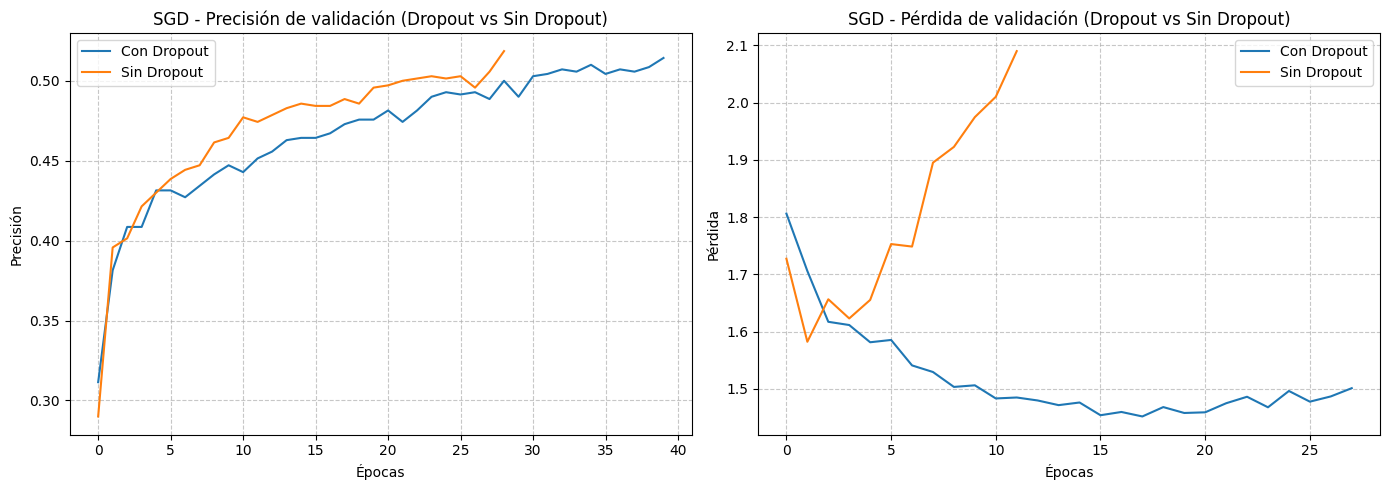

In [ ]:

#@title Comparación de Dropout y sin Dropout en SGD (Precisión y Pérdida) { display-mode: "form" }

plt.figure(figsize=(14, 5))  # SOLO UN figure

# Primer gráfico (val_accuracy)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.plot(history_mlp_sgd.history['val_accuracy'], label='Con Dropout')
plt.plot(history_mlp_sgd_no_dropout.history['val_accuracy'], label='Sin Dropout')
plt.title('SGD - Precisión de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Segundo gráfico (val_loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.plot(history_mlp.history['val_loss'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_loss'], label='Sin Dropout')
plt.title('SGD - Pérdida de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todo junto
plt.tight_layout()
plt.show()

 <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote><p align = 'justify'>Se puede observar que la perdida es cosiderablemente alta en el modelo sin Dropout, comprobando lo que se dijo en el modelo MLP anterior con ADAM <br> </p> </font>

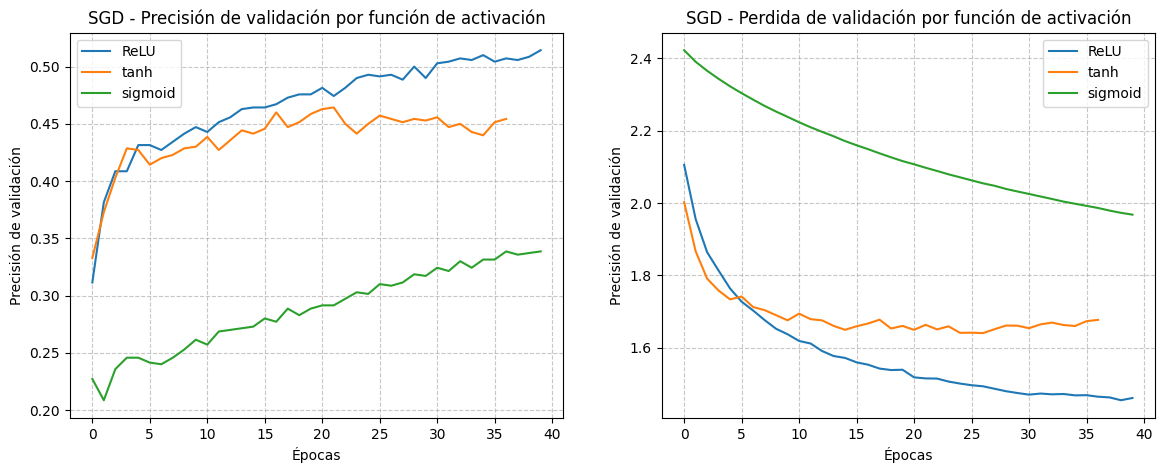

In [ ]:
#@title Comparación de funciones de activación en SGD { display-mode: "form" }

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_sgd.history['val_accuracy'], label='ReLU')
plt.plot(history_mlp_sgd_tanh.history['val_accuracy'], label='tanh')
plt.plot(history_mlp_sgd_sigmoid.history['val_accuracy'], label='sigmoid')
plt.title('SGD - Precisión de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(history_mlp_sgd.history['val_loss'], label='ReLU')
plt.plot(history_mlp_sgd_tanh.history['val_loss'], label='tanh')
plt.plot(history_mlp_sgd_sigmoid.history['val_loss'], label='sigmoid')
plt.title('SGD - Perdida de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote><p align = 'justify'>Se observa que ReLu nuevamente tiene mejor desempeño en SGD, teniendo una mayor precision y una menor perdida. <br> </p> </font>

In [ ]:
#@title METRICAS PARA SGD { display-mode: "form" }
print("\nResultados SGD:")
print(tabulate(sgd_df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))



Resultados SGD:
╒════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                    │   Accuracy │   Precision │   Recall │   F1-Score │
╞════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ SGD_ReLU_Dropout   │     0.5086 │      0.4828 │   0.4733 │     0.4729 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_ReLU_NoDropout │     0.4857 │      0.4562 │   0.4542 │     0.4524 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_Tanh           │     0.4543 │      0.4198 │   0.4125 │     0.4094 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_Sigmoid        │     0.3386 │      0.3194 │   0.2592 │     0.2184 │
╘════════════════════╧════════════╧═════════════╧══════════╧════════════╛


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<dl>
<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Accuracy </dt>
  <dd> El accuracy de los modelos con ReLU (con y sin dropout) es muy similar, alrededor del 50%, lo cual sigue siendo un valor bajo, pero ligeramente mejor que los modelos con Tanh o Sigmoid.  </dd>
<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Precision </dt>
  <dd>La precision mide la proporción de predicciones positivas correctas. Los modelos con ReLU tienen una precisión cercanas al %50 pero por debajo de este. </dd>

<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  Recall </dt>
  <dd>os modelos con ReLU también tienen el mejor recall (~48%), lo que significa que están capturando alrededor de la mitad de los ejemplos positivos correctamente.</dd>

<dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
  <dt>  F1-score </dt>
  <dd>El F1-Score es una combinación de precision y recall, y de nuevo muestra que los modelos con ReLU (especialmente el que tiene Dropout) tienen el mejor rendimiento global.  </dd>
  <dt>  ────────────────────────────────────────────────────────────────────────────── </dt>
</dl>
</font> </p>

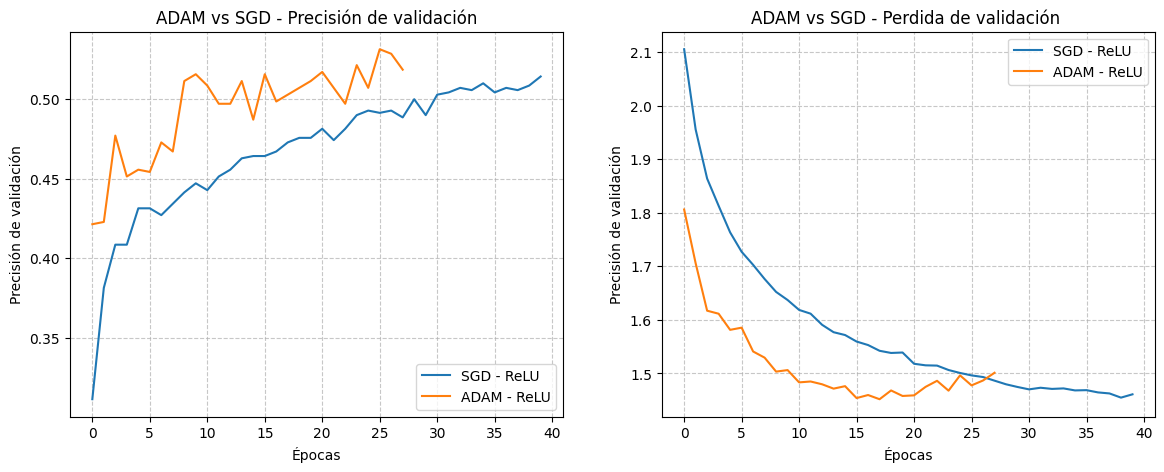

In [ ]:
#@title Comparación de modelos ADAM y SGD con función de activación ReLu{ display-mode: "form" }

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_sgd.history['val_accuracy'], label='SGD - ReLU')
plt.plot(history_mlp.history['val_accuracy'], label='ADAM - ReLU')

plt.title('ADAM vs SGD - Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(history_mlp_sgd.history['val_loss'], label='SGD - ReLU')
plt.plot(history_mlp.history['val_loss'], label='ADAM - ReLU')
plt.title('ADAM vs SGD - Perdida de validación ')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote><p align = 'justify'>Se observa que Adam converge más rápido, pero ambos pueden tener overfitting sin el uso de Dropout. <br><bR> Tambien como se observó en los gráficos anteriores ReLu tiene mejor desempeño que las otras funciones de activación, es por ello que en este gráfico se comparan ReLu de ADAM y SGD </p> </font>


# <p align = 'justify'> <font face="Impact" size=5 color='#d39aed'> Conclusion </font> </p>


 <font face="Comic Sans MS" size=4 color='#d39aed'><blockquote><p align = 'justify'>El Dropout es esencial para mejorar la generalización del modelo.
El mejor rendimiento se obtuvo con Adam como optimizador y ReLU como función de activación.
Sin embargo, los resultados podrían mejorar experimentando con:

<ul type = "square">
  <li><i>El número de capas.</li>
  <li>La cantidad de neuronas.</li>
  <li>La tasa de aprendizaje o batch size.</li>
  

  
<ul></p> </font>







-

-

-

-

-

In [ ]:
#@title Codigo entero por si se debe ejecutar { display-mode: "form" }
#-- Importación de librerías necesarias --
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau

# -- Cargar los datos a trabajar --
data = np.load("cifar_subset_tf.npz")
images = data["images"]
labels = data["labels"]

#MAPEO
labels_antes = np.unique(labels)
print(labels_antes)
#-- Remapear etiquetas --
unique_labels = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique_labels)}
labels = np.array([label_map[l] for l in labels])
num_classes = len(np.unique(labels))
num_classes
labels_despues = np.unique(labels)
print(labels_despues)

#-- Dividir en entrenamiento y prueba --
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

#-- Crear datasets TensorFlow --
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)



#=====================================================================================
#MODELOS ADAM
#=====================================================================================
# --- Modelo MLP ReLu ADAM CON DROP---
model_mlp = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Imagen original
    layers.Flatten(),                 # Aplanamos todo a un vector

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')  # Salida para clasificación
])

model_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Entrenamiento MLP ---
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history_mlp = model_mlp.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)

# --- Modelo MLP ADAM usando tanh ---
model_mlp_tanh = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_tanh.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar
history_mlp_tanh = model_mlp_tanh.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop]
)


# --- Modelo MLP ADAM usando sigmoid ---
model_mlp_sigmoid = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_sigmoid.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp_sigmoid = model_mlp_sigmoid.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop]
)


# --- Modelo MLP SIN Dropout ---
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_mlp_no_dropout = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    # No Dropout aquí

    layers.Dense(256, activation='relu'),
    # No Dropout aquí

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_no_dropout.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Entrenamiento MLP ---
history_mlp_no_dropout = model_mlp_no_dropout.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20,
    callbacks=[early_stop]
)


#METRICAS
# Diccionario para guardar resultados
adam_results = {}

# Modelos Adam
adam_models = {
    'Adam_ReLU_Dropout': model_mlp,
    'Adam_ReLU_NoDropout': model_mlp_no_dropout,
    'Adam_Tanh': model_mlp_tanh,
    'Adam_Sigmoid': model_mlp_sigmoid
}

# Evaluar cada modelo
for name, model in adam_models.items():
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(y_test, y_pred_classes, output_dict=True)

    adam_results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    }

# Crear DataFrame
adam_df = pd.DataFrame.from_dict(adam_results, orient='index')
#print(adam_df)


#====================================================================================================
#MODELOS SGD
#===================================================================================================


# --- Modelo MLP usando SGD ---
model_mlp_sgd_no_dropout = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    #

    layers.Dense(256, activation='relu'),
    #

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_no_dropout.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_no_dropout = model_mlp_sgd_no_dropout.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


# --- Modelo MLP usando SGD ---
model_mlp_sgd = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), # se probo tambien con 0.01
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd = model_mlp_sgd.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


# --- Modelo MLP usando SGD ---
model_mlp_sgd_tanh = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_tanh.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_tanh = model_mlp_sgd_tanh.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


# --- Modelo MLP usando SGD ---
model_mlp_sgd_sigmoid = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_sigmoid.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_sigmoid = model_mlp_sgd_sigmoid.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


#METRICAS
# Diccionario para guardar resultados
sgd_results = {}

# Modelos SGD
sgd_models = {
    'SGD_ReLU_Dropout': model_mlp_sgd,
    'SGD_ReLU_NoDropout': model_mlp_sgd_no_dropout,
    'SGD_Tanh': model_mlp_sgd_tanh,
    'SGD_Sigmoid': model_mlp_sgd_sigmoid
}

# Evaluar cada modelo
for name, model in sgd_models.items():
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(y_test, y_pred_classes, output_dict=True)

    sgd_results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    }

# Crear DataFrame
sgd_df = pd.DataFrame.from_dict(sgd_results, orient='index')
#print(sgd_df)

